In [1]:
import mujoco as mu
import mujoco.viewer as vi
import mediapy as media
import numpy as np

In [2]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="sq" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""



xml2 = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""

In [3]:
xml3 = """
<mujoco>
  <asset>
    <mesh file="testSquare.stl"/>
  </asset>
  <worldbody>
    <body>
    <! -- <freejoint/> -->
    <geom type ="mesh" name="sq" mesh = "testSquare"rgba="1 0 0 1"/>
    </body>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""

model = mu.MjModel.from_xml_string(xml2)
data = mu.MjData(model)
mu.mj_kinematics(model,data)

In [4]:
#accesing the model
print(model.ngeom)
#model.geom() - tells valid names
#print(model.geom("sq"))
#print(model.geom("sq").id)
print(model.geom(0).name)
print(model.geom(1).name)


2
red_box
green_sphere


In [5]:
#observing the data
print(data.geom_xpos)
#print(data.geom("sq").xpos)

[[0.         0.         0.        ]
 [0.27320508 0.07320508 0.2       ]]


""

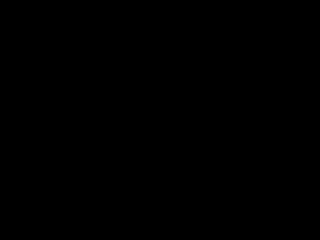

In [6]:
rend = mu.Renderer(model)
media.show_image(rend.render())

""

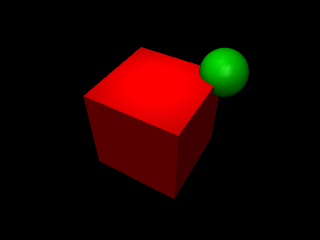

In [7]:
mu.mj_forward(model,data)
rend.update_scene(data)
media.show_image(rend.render())

""

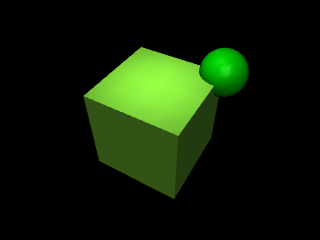

In [8]:
model.geom('red_box').rgba[:3] = np.random.rand(3)
rend.update_scene(data)
media.show_image(rend.render())

In [15]:
duration = 3.8  # (seconds)
framerate = 60  # (Hz)

# enable joint visualization option:
scene_option = mu.MjvOption()
scene_option.flags[mu.mjtVisFlag.mjVIS_JOINT] = True

# Simulate and display video.
frames = []
mu.mj_resetData(model, data)  # Reset state and time.
while data.time < duration:
  mu.mj_step(model, data)
  if len(frames) < data.time * framerate:
    rend.update_scene(data)
    pixels = rend.render()
    frames.append(pixels)
media.show_video(frames, fps=framerate)

In [14]:
print('default gravity', model.opt.gravity)
model.opt.gravity = (0, 0, 10)
print('flipped gravity', model.opt.gravity)

frames = []
mu.mj_resetData(model, data)
while data.time < duration:
  mu.mj_step(model, data)
  if len(frames) < data.time * framerate:
    rend.update_scene(data, scene_option=scene_option)
    pixels = rend.render()
    frames.append(pixels)

media.show_video(frames, fps=60)

default gravity [ 0.  0. 10.]
flipped gravity [ 0.  0. 10.]


In [13]:

vi.launch(model)